## Obtaining Bioactivity Data from CHEMBL

In [1]:
import pandas as pd
import numpy as np

In [2]:
from chembl_webresource_client.new_client import new_client

In [ ]:
targets = new_client.target.search('Dengue virus')

In [ ]:
targets_df = pd.DataFrame(targets).head(20)

In [ ]:
targets_df.to_csv('top20denguetargets.csv')

In [6]:
target_id = targets_df.target_chembl_id[5]
#targets_df.loc[5, 'target_chembl_id']

In [7]:
activity = new_client.activity.filter(target_chembl_id=target_id).filter(standard_type='IC50')

In [8]:
activity_df = pd.DataFrame(activity)

In [9]:
activity_df.columns

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

In [10]:
activity_df = activity_df[['molecule_chembl_id', 'canonical_smiles', 'standard_value']]

In [11]:
activity_df.isna().sum()

molecule_chembl_id     0
canonical_smiles       0
standard_value        47
dtype: int64

In [12]:
activity_df.dtypes

molecule_chembl_id    object
canonical_smiles      object
standard_value        object
dtype: object

In [13]:
activity_df.dropna(inplace=True)

In [14]:
activity_df.standard_value = activity_df.standard_value.astype('float')

In [16]:
activity_df.dtypes

molecule_chembl_id     object
canonical_smiles       object
standard_value        float64
dtype: object

In [23]:
import matplotlib.pyplot as plt

<Axes: ylabel='Frequency'>

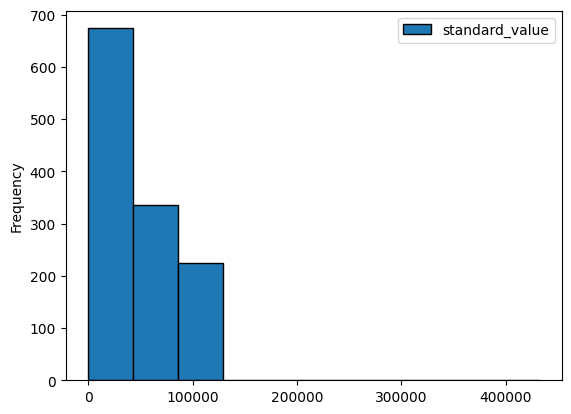

In [29]:
activity_df.plot(kind='hist', edgecolor='black')

{'whiskers': [<matplotlib.lines.Line2D at 0x21c23837e20>,
 'caps': [<matplotlib.lines.Line2D at 0x21c2382aa60>,
 'boxes': [<matplotlib.lines.Line2D at 0x21c23837be0>],
 'medians': [<matplotlib.lines.Line2D at 0x21c238857c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21c23885a60>],
 'means': []}

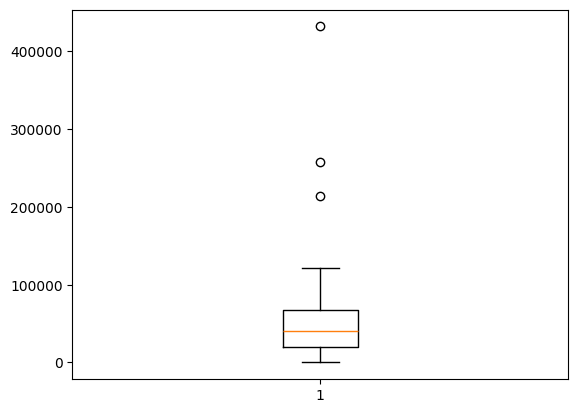

In [25]:
plt.boxplot(activity_df.standard_value)

In [19]:
activity_df.describe()

,standard_value
count,1237.000000
mean,46433.283331
std,34762.712868
min,0.480000
25%,19410.000000
50%,39880.000000
75%,68100.000000
max,432000.000000


In [34]:
bio_activity = []
for i in activity_df.standard_value:
    if float(i) <= 1000:
        bio_activity.append('active')
    elif float(i) >= 10000:
        bio_activity.append('inactive')
    else:
        bio_activity.append('intermediate')

In [35]:
activity_df['bio_activity'] = bio_activity

In [36]:
activity_df.bio_activity.value_counts()

bio_activity
inactive        1042
intermediate     158
active            37
Name: count, dtype: int64

In [39]:
activity_df.to_csv('preprocessed_dengue_bioactivity_df.csv', index=False)